# Assignment 1

#### Import

In [178]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [77]:
data = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data.drop(data.index[0], inplace=True)

/home/aaron/.virtualenvs/class/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,9,11,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 15429
Columns: 397 entries, Unnamed: 0 to index
dtypes: float64(1), int64(1), object(395)
memory usage: 46.9+ MB


In [4]:
data.shape

(15429, 397)

In [5]:
data.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0
5,8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,...,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,4.0


#### Check Number of Nan Values

In [6]:
data.isna().sum()

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                         0
Q5                                       135
Q6                                         0
Q6_OTHER_TEXT                              0
Q7                                         0
Q7_OTHER_TEXT                              0
Q8                                        76
Q9                                         0
Q10                                      292
Q11_Part_1                              7966
Q11_Part_2                             11186
Q11_Part_3                             11278
Q11_Part_4                              9705
Q11_Part_5                             11845
Q11_Part_6                             12914
Q11_Part_7                             14758
Q11_OTHER_

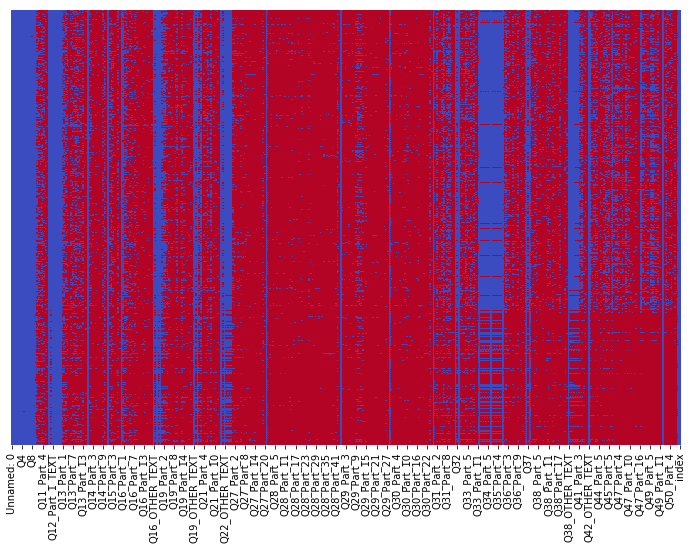

In [7]:
# show heatmap of all the nan values
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

#### Gender

In [8]:
# Gender percentage
gender_count = data.Q1.value_counts(normalize=True)
gender_count

Male                       0.833884
Female                     0.154255
Prefer not to say          0.008426
Prefer to self-describe    0.003435
Name: Q1, dtype: float64

#### Age

In [9]:
age_count = data.Q2.value_counts()
age_count

25-29    4278
22-24    2894
30-34    2819
35-39    1637
18-21    1363
40-44     989
45-49     602
50-54     403
55-59     222
60-69     180
70-79      26
80+        16
Name: Q2, dtype: int64

In [10]:
age_count = data.Q2.value_counts(normalize=True)
age_count

25-29    0.277270
22-24    0.187569
30-34    0.182708
35-39    0.106099
18-21    0.088340
40-44    0.064100
45-49    0.039017
50-54    0.026120
55-59    0.014388
60-69    0.011666
70-79    0.001685
80+      0.001037
Name: Q2, dtype: float64

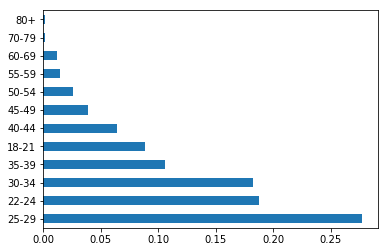

In [19]:
age_count.plot.barh()

#### Countries

In [11]:
# Number of Unique Countries
data.Q3.nunique()

58

In [12]:
# Countries and their frequency
countries_count = data.Q3.value_counts()
countries_count

United States of America                                3393
India                                                   2320
China                                                    870
Other                                                    677
Russia                                                   581
Brazil                                                   557
Germany                                                  506
United Kingdom of Great Britain and Northern Ireland     495
Canada                                                   441
France                                                   423
Japan                                                    412
Spain                                                    364
Italy                                                    244
Australia                                                234
Poland                                                   214
Turkey                                                   199
Netherlands             

In [21]:
# Countries with less than certain counts
# countries_count.index[countries_count < 100]

In [20]:
# value_mask = data.Q3.isin(countries_count.index[countries_count < 50]) 
## set locations with < 100 postings to other
# data.loc[value_mask,'Q3'] = "Other"
#adj_countries_count = data.Q3.value_counts()
#adj_countries_count

In [22]:
#data.Q3.nunique()

58

#### Education

In [13]:
degree_count = data.Q4.value_counts(normalize=True)
degree_count

Master’s degree                                                      0.472228
Bachelor’s degree                                                    0.284075
Doctoral degree                                                      0.163458
Some college/university study without earning a bachelor’s degree    0.038175
Professional degree                                                  0.024888
No formal education past high school                                 0.008750
I prefer not to answer                                               0.008426
Name: Q4, dtype: float64

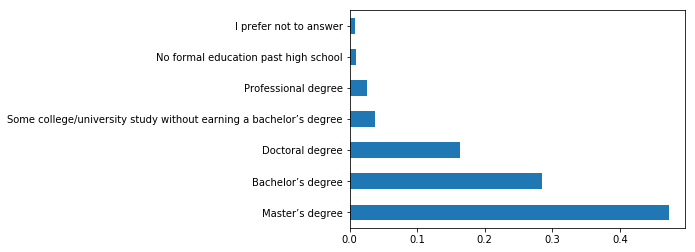

In [14]:
degree_count.plot.barh()

##### There are missing values in Majors

In [25]:
data[data['Q5'].isna()]

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
175,235,895,Male,-1,25-29,China,No formal education past high school,NaN,Software Engineer,-1,...,NaN,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,174.0
536,831,838,Male,-1,35-39,United Kingdom of Great Britain and Northern I...,No formal education past high school,NaN,Other,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,7,535.0
660,991,1105,Male,-1,40-44,Czech Republic,No formal education past high school,NaN,Software Engineer,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,659.0
962,1419,2142,Male,-1,30-34,Belarus,No formal education past high school,NaN,Software Engineer,-1,...,NaN,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,961.0
1057,1544,1205,Male,-1,22-24,Japan,No formal education past high school,NaN,Product/Project Manager,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1056.0
1747,2451,687,Male,-1,30-34,Israel,No formal education past high school,NaN,Software Engineer,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1746.0
1765,2478,1494,Male,-1,18-21,Ukraine,No formal education past high school,NaN,Consultant,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,1764.0
1788,2509,2396,Male,-1,35-39,Other,No formal education past high school,NaN,Data Scientist,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,None of these reasons apply to me,NaN,-1,1787.0
2010,2805,1580,Male,-1,35-39,Russia,No formal education past high school,NaN,Data Scientist,-1,...,NaN,Too time-consuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,-1,2009.0
2151,2974,834,Male,-1,45-49,Canada,No formal education past high school,NaN,Data Analyst,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,None of these reasons apply to me,NaN,-1,2150.0


In [23]:
major_count = data.Q5.value_counts(normalize=True)
major_count

Computer science (software engineering, etc.)                    0.388191
Engineering (non-computer focused)                               0.161436
Mathematics or statistics                                        0.135609
A business discipline (accounting, economics, finance, etc.)     0.084347
Physics or astronomy                                             0.055120
Information technology, networking, or system administration     0.041977
Medical or life sciences (biology, chemistry, medicine, etc.)    0.040212
Other                                                            0.032627
Social sciences (anthropology, psychology, sociology, etc.)      0.027004
Humanities (history, literature, philosophy, etc.)               0.013731
Environmental science or geology                                 0.011442
I never declared a major                                         0.004446
Fine arts or performing arts                                     0.003858
Name: Q5, dtype: float64

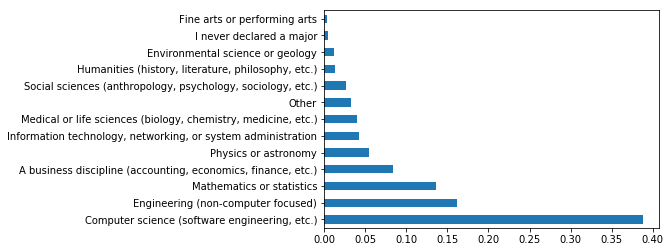

In [24]:
major_count.plot.barh()

#### Title

In [27]:
title_count = data.Q6.value_counts()
title_count

Data Scientist             3249
Student                    2620
Software Engineer          2340
Data Analyst               1428
Other                      1019
Research Scientist          925
Business Analyst            590
Consultant                  573
Data Engineer               564
Manager                     452
Research Assistant          447
Product/Project Manager     329
Chief Officer               251
Statistician                180
DBA/Database Engineer       117
Marketing Analyst            87
Developer Advocate           85
Principal Investigator       83
Salesperson                  80
Data Journalist              10
Name: Q6, dtype: int64

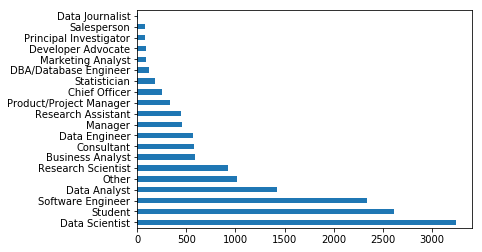

In [28]:
title_count.plot.barh()

In [26]:
industry_count = data.Q7.value_counts()
industry_count

Computers/Technology                      4179
I am a student                            2248
Academics/Education                       1981
Accounting/Finance                        1181
Other                                      750
Online Service/Internet-based Services     715
Medical/Pharmaceutical                     592
Government/Public Service                  524
Insurance/Risk Assessment                  454
Manufacturing/Fabrication                  435
Marketing/CRM                              386
Retail/Sales                               356
Energy/Mining                              345
Broadcasting/Communications                319
Online Business/Internet-based Sales       272
Shipping/Transportation                    237
Non-profit/Service                         153
Hospitality/Entertainment/Sports           152
Military/Security/Defense                  150
Name: Q7, dtype: int64

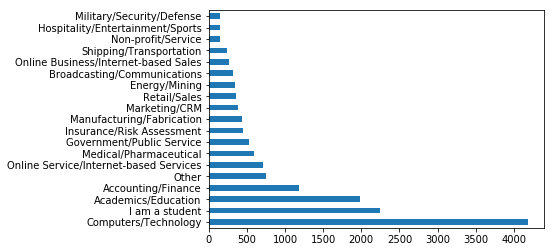

In [27]:
industry_count.plot.barh()

#### Experience

In [30]:
experience_count = data.Q8.value_counts(normalize=True)
experience_count

0-1      0.252654
1-2      0.184068
5-10     0.128509
2-3      0.127988
3-4      0.085195
4-5      0.074578
10-15    0.073145
15-20    0.038755
20-25    0.017651
30 +     0.009379
25-30    0.008077
Name: Q8, dtype: float64

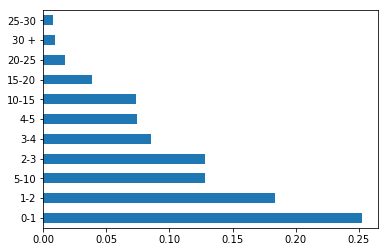

In [31]:
experience_count.plot.barh()

#### Salary

In [32]:
salary_count = data.Q9.value_counts(normalize=True)
salary_count

0-10,000       0.285048
10-20,000      0.125543
20-30,000      0.090414
30-40,000      0.072526
40-50,000      0.062545
50-60,000      0.059563
100-125,000    0.054637
60-70,000      0.047249
70-80,000      0.043878
90-100,000     0.036684
125-150,000    0.034545
80-90,000      0.032795
150-200,000    0.029620
200-250,000    0.011148
250-300,000    0.004861
500,000+       0.004083
300-400,000    0.003370
400-500,000    0.001491
Name: Q9, dtype: float64

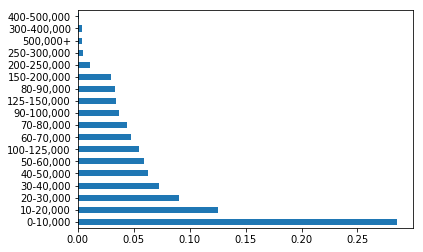

In [33]:
salary_count.plot.barh()

#### Primary Tool Used 

In [34]:
tool_count = data.Q12_MULTIPLE_CHOICE.value_counts()
tool_count

Local or hosted development environments (RStudio, JupyterLab, etc.)    6935
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       2692
Other                                                                   1246
Advanced statistical software (SPSS, SAS, etc.)                         1079
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                1020
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     885
Name: Q12_MULTIPLE_CHOICE, dtype: int64

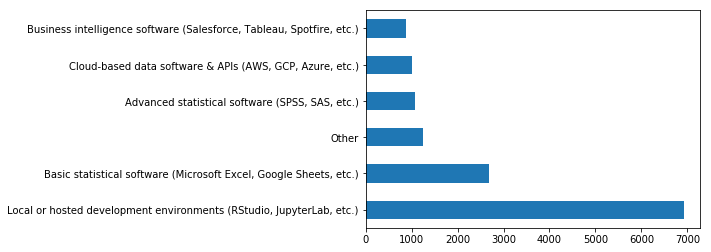

In [35]:
tool_count.plot.barh()

### Plots 

#### Degree and Gender vs Salary

In [15]:
# showing degree vs salary range
data[['Q4', 'Q9']].head()

,Q4,Q9
1,Bachelor’s degree,"10-20,000"
2,Master’s degree,"0-10,000"
3,Master’s degree,"0-10,000"
4,Doctoral degree,"10-20,000"
5,Master’s degree,"0-10,000"


In [16]:
# function to encode the salary range
def encode_salary(salary):
    if "0-10,000" in salary:
        return 1
    if "10-20,000" in salary:
        return 2
    if "20-30,000" in salary:
        return 3
    if "30-40,000" in salary:
        return 4
    if "40-50,000" in salary:
        return 5
    if "50-60,000" in salary:
        return 6
    if "60-70,000" in salary:
        return 7
    if "70-80,000" in salary:
        return 8
    if "80-90,000" in salary:
        return 9
    if "90-100,000" in salary:
        return 10
    if "100-125,000" in salary:
        return 11
    if "125-150,000" in salary:
        return 12
    if "150-200,000" in salary:
        return 13
    if "200-250,000" in salary:
        return 14
    if "250-300,000" in salary:
        return 15
    if "300-400,000" in salary:
        return 16
    if "400-500,000" in salary:
        return 17
    if "500,000+" in salary:
        return 18

In [17]:
# Create a new column with the encoded salary
data["encoded_salary"]=data["Q9"].apply(encode_salary)

#### Age+Experience and Salary 

In [51]:
sns.catplot(x='Q2', y='encoded_salary', hue='Q8', data=data, kind="box", legend = False ).fig.set_size_inches(200,80)
plt.legend(loc='best')
sns.set(font_scale=1)

#### Countries and Salary 

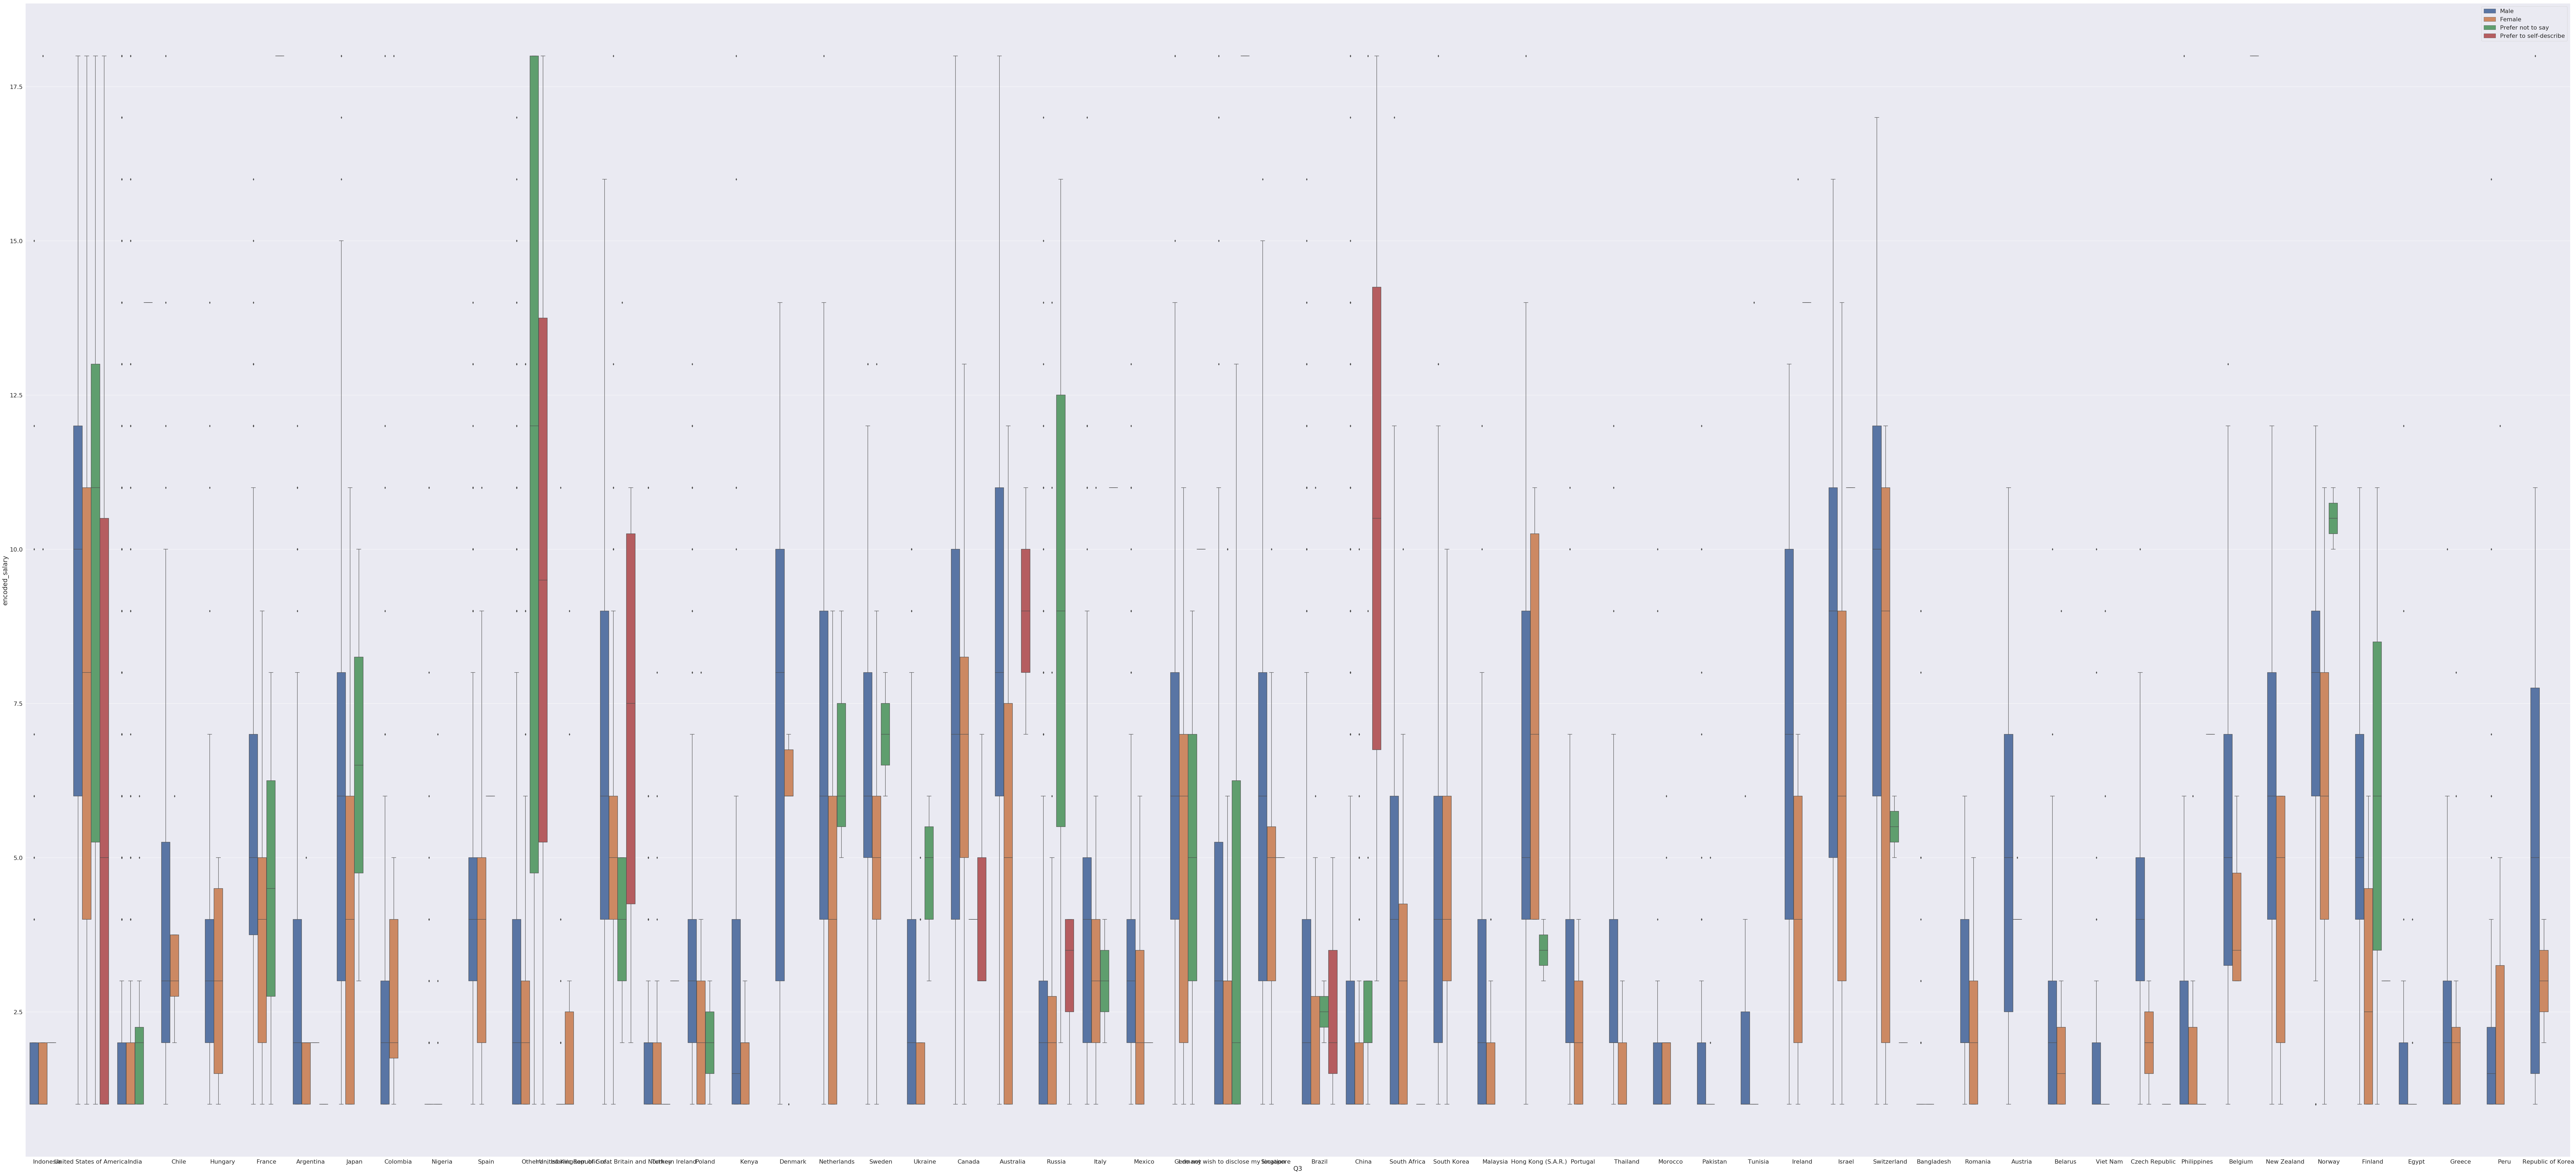

In [46]:
sns.catplot(x='Q3', y='encoded_salary', hue='Q1', data=data, kind="box",legend = False ).fig.set_size_inches(200,80)
plt.legend(loc='best')
sns.set(font_scale=1)

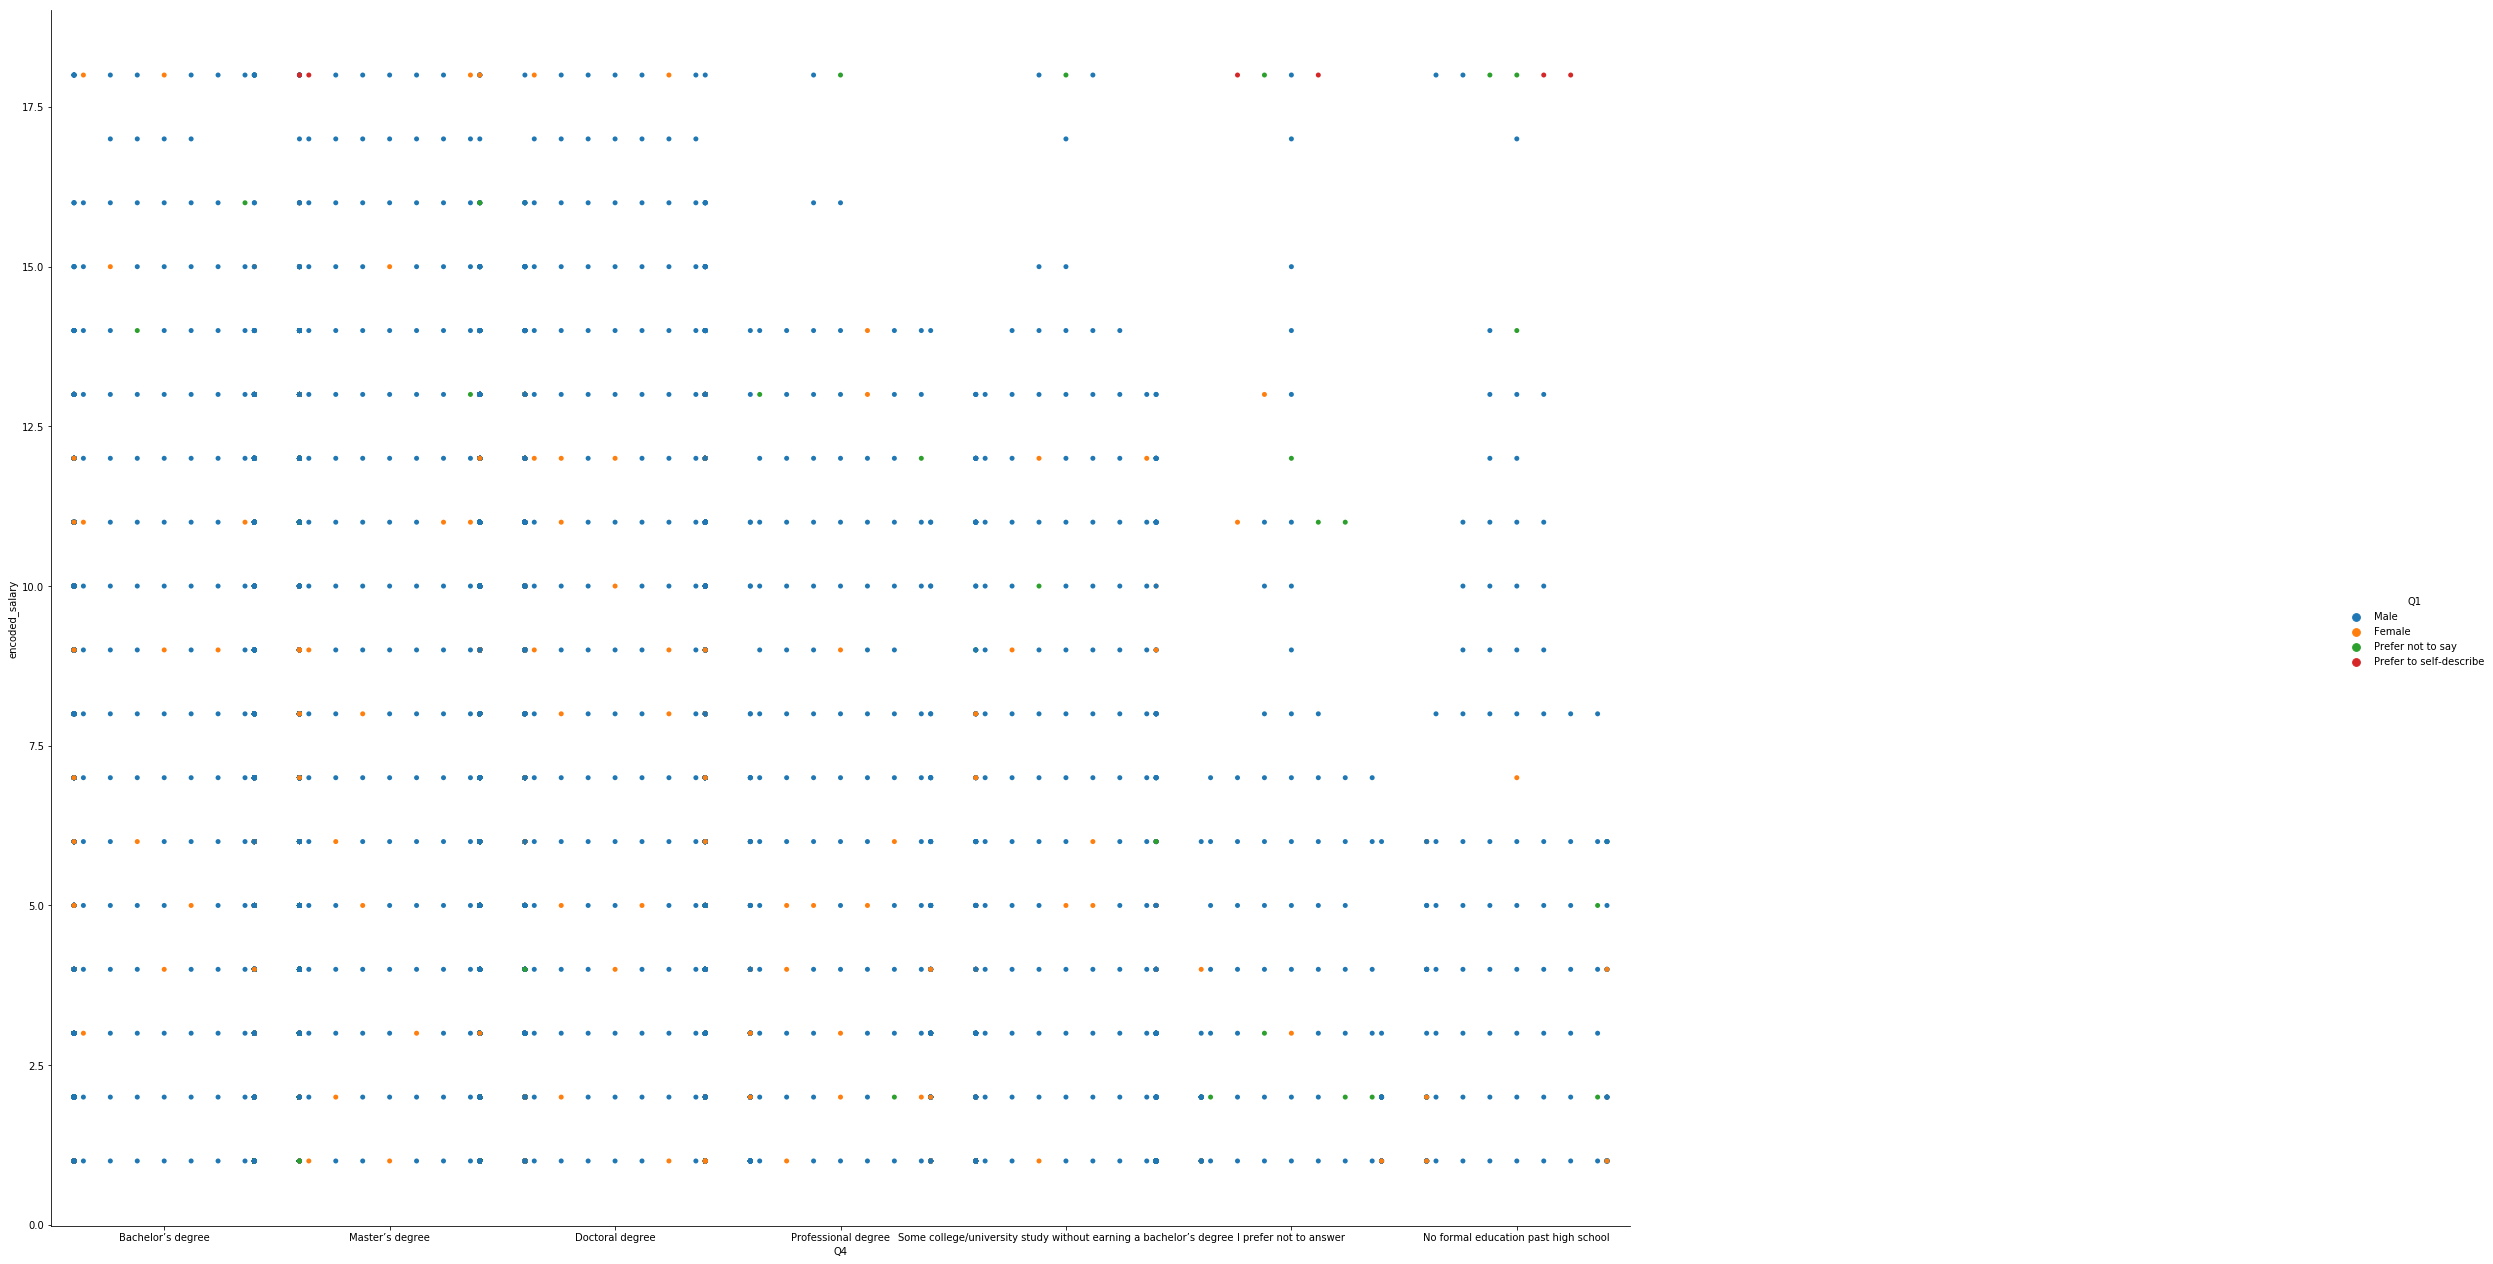

In [92]:
#sns.catplot(x='Q4', y='encoded_salary', hue='Q1',kind="swarm", data=data).fig.set_size_inches(40,20)

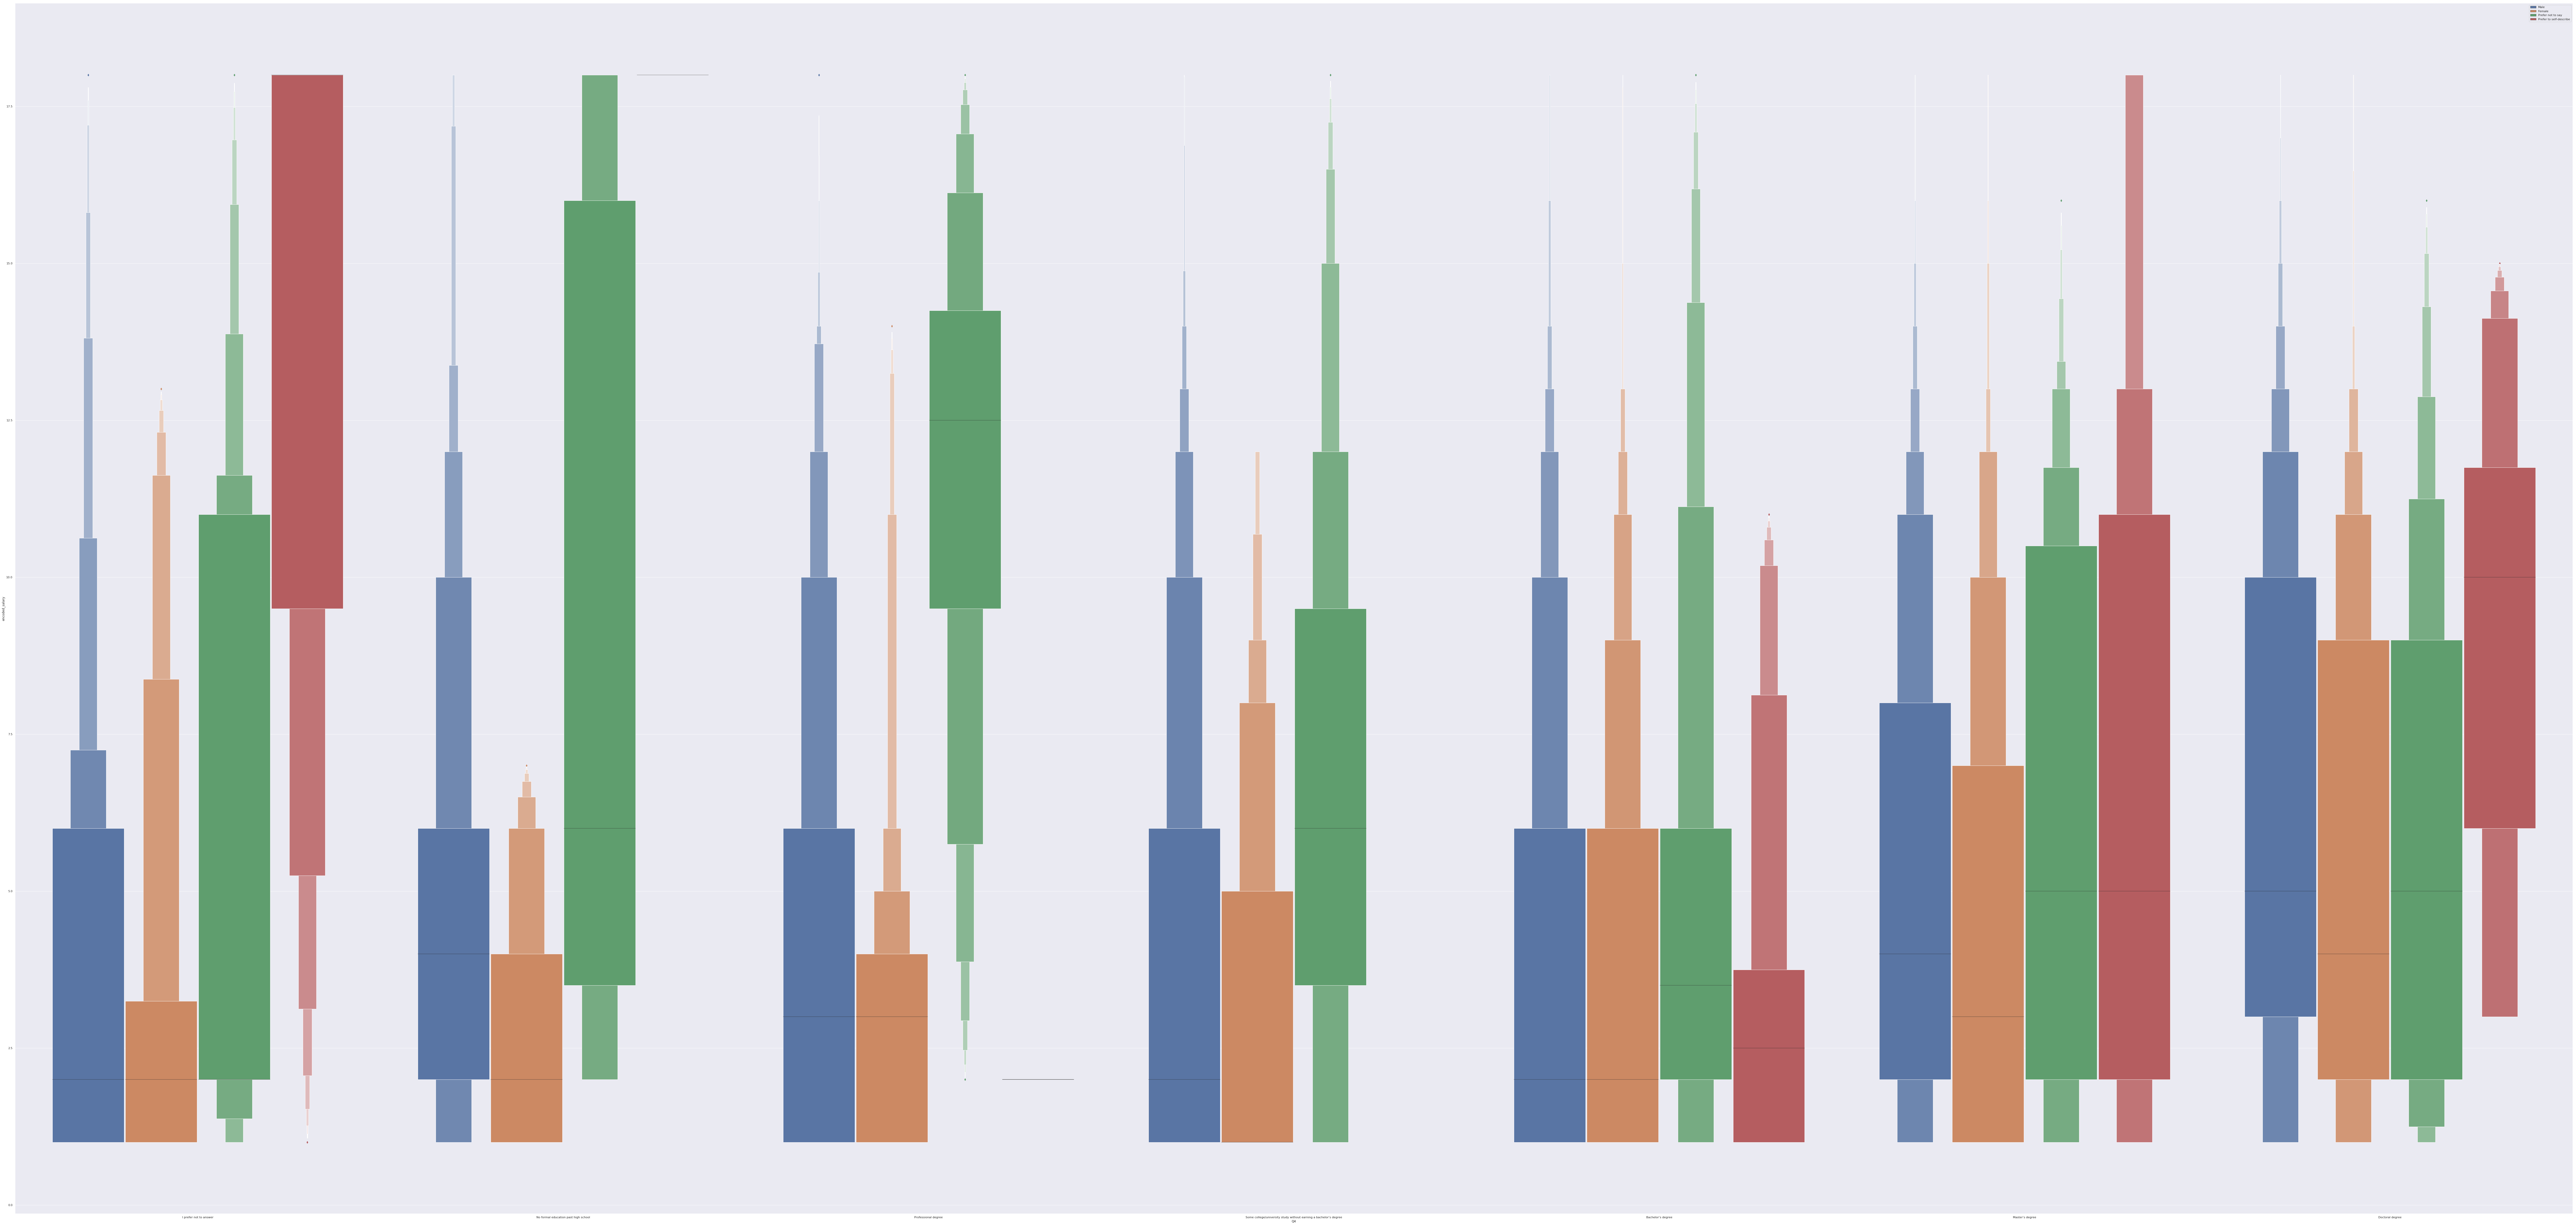

In [49]:
sns.catplot(x='Q4', y='encoded_salary', hue='Q1', data=data, kind="boxen", order=["I prefer not to answer", "No formal education past high school", "Professional degree", "Some college/university study without earning a bachelor’s degree", "Bachelor’s degree", "Master’s degree", "Doctoral degree"], legend = False ).fig.set_size_inches(200,80)
plt.legend(loc='best')
sns.set(font_scale=2)

#### Experience and Degree vs Salary

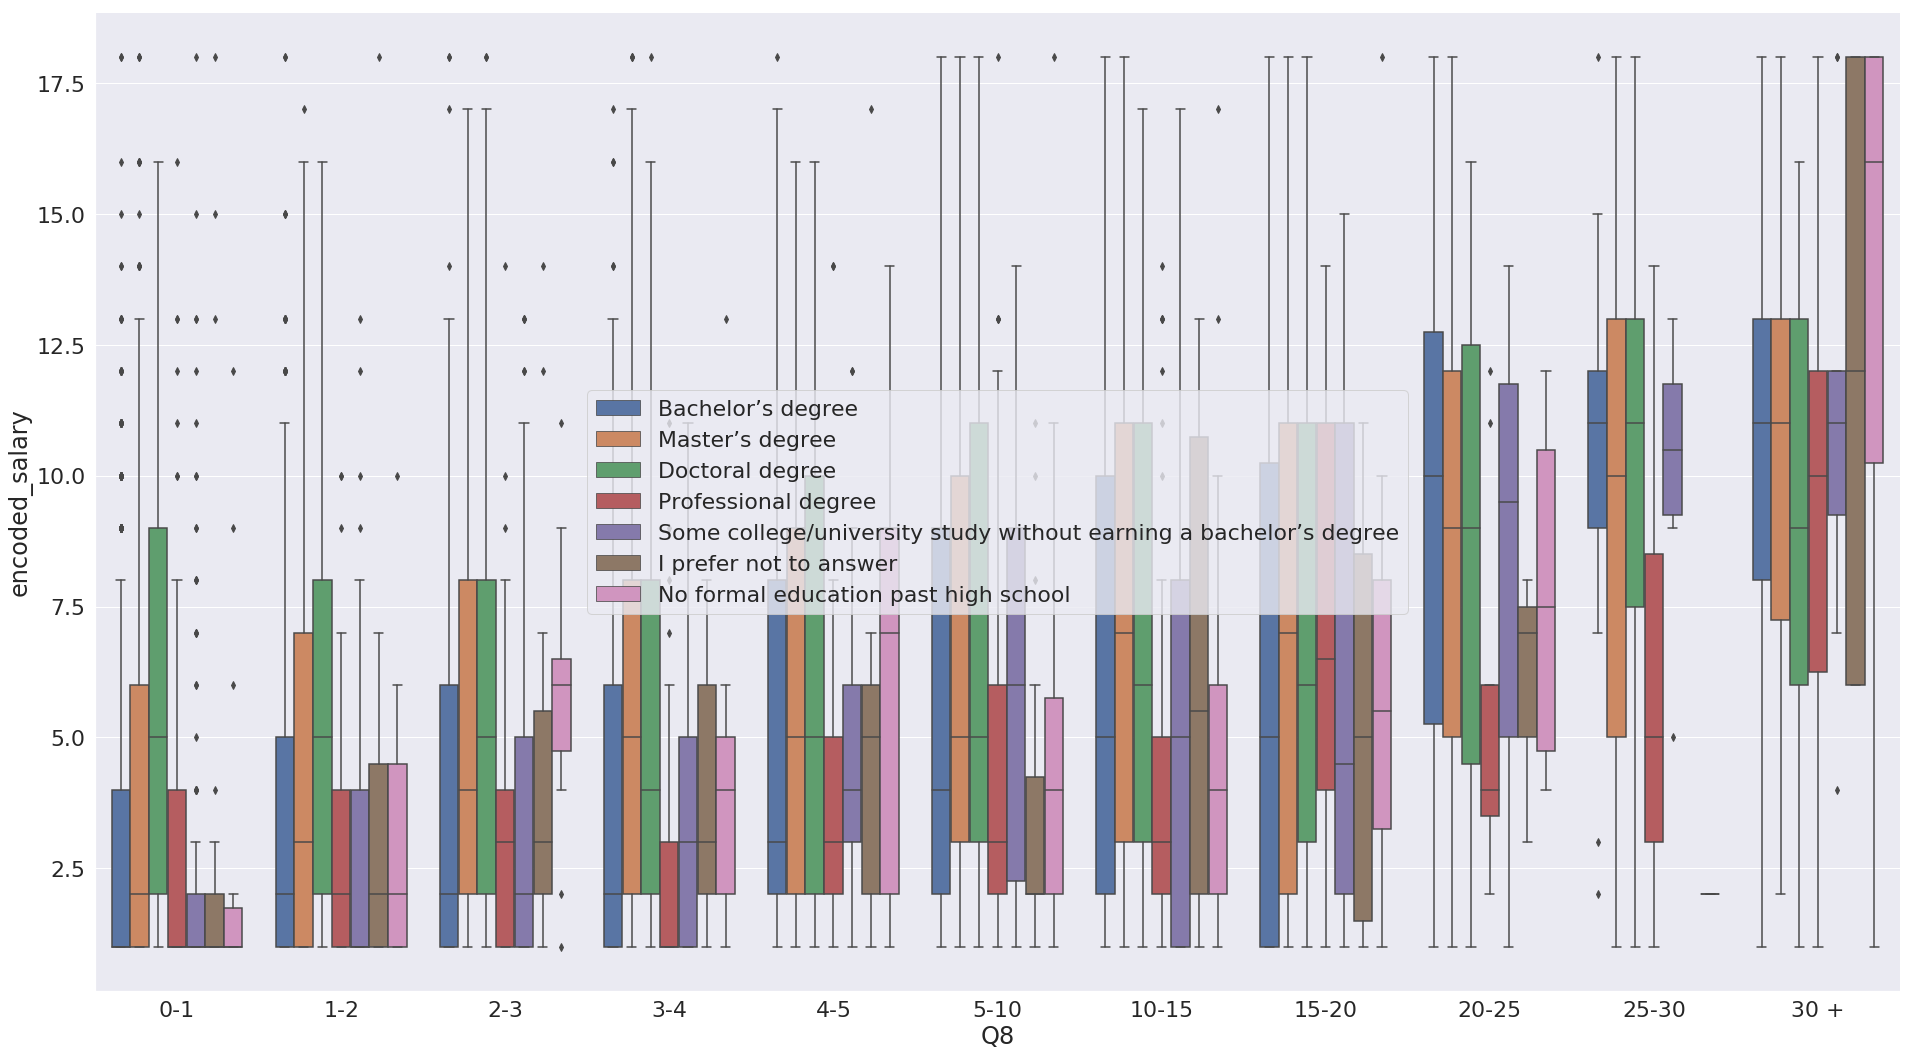

In [36]:
sns.catplot(x='Q8', y='encoded_salary', hue='Q4', data=data, order=['0-1', '1-2', '2-3','3-4','4-5','5-10','10-15','15-20','20-25','25-30','30 +'], kind="box", legend = False).fig.set_size_inches(40,20)
plt.legend(loc='best')
sns.set(font_scale=5)

### Cleaning Text Data

#### Cleaning up Q10 

In [182]:
data = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data.drop(data.index[0], inplace=True)
vectorizer = CountVectorizer(analyzer = "word", # the feature should be made of word
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = 'english', # Remove stop words such as “the”, “a”, etc.
                             max_features = 10)

In [186]:
data2 = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data2.drop(data.index[0], inplace=True)
tf_vectorizer = TfidfVectorizer(max_features = 10)
tf_vectorizer.fit_transform(data['Q10'].values.astype('U'))
print(tf_vectorizer.get_feature_names()[:20])

/home/aaron/.virtualenvs/class/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,9,11,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['do', 'for', 'in', 'methods', 'ml', 'models', 'not', 'production', 'than', 'we']


In [185]:
Words = vectorizer.fit_transform(data['Q10'].values.astype('U'))
print(vectorizer.get_feature_names()[:20])

['day', 'exploring', 'methods', 'ml', 'model', 'models', 'production', 'recently', 'use', 'years']


In [143]:
words_array = Words.toarray()
print(words_array)

[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [0 0 1 ... 1 0 1]]


In [144]:
words_array[4]

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [145]:
words_array[10]

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

#### Q11

In [180]:
data = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data.drop(data.index[0], inplace=True)
count_vectorizer = CountVectorizer(analyzer = "word", # the feature should be made of word
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = 'english', # Remove stop words such as “the”, “a”, etc.
                             max_features = 1)

NameError: name 'corpus' is not defined

In [175]:
Words = count_vectorizer.fit_transform(data['Q11_Part_1'].values.astype('U'))
print(count_vectorizer.get_feature_names()[:20])

['nan']


In [176]:
words_array = Words.toarray()
print(words_array)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


#### Q17

In [179]:
data = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data.drop(data.index[0], inplace=True)
vectorizer = CountVectorizer(analyzer = "word", # the feature should be made of word
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = 'english', # Remove stop words such as “the”, “a”, etc.
                             max_features = 15)

In [172]:
Words = vectorizer.fit_transform(data['Q17'].values.astype('U'))
print(vectorizer.get_feature_names()[:20])

['basic', 'java', 'javascript', 'matlab', 'nan', 'net', 'php', 'python', 'sas', 'scala', 'sql', 'stata', 'typescript', 'vba', 'visual']


In [164]:
words_array = Words.toarray()
print(words_array)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [165]:
words_array[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [166]:
words_array[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])